<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/RexolitePlate_DecisionTreeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
import io
from google.colab import files

In [3]:
uploaded = files.upload()

Saving 0041-83493_Rev07.csv to 0041-83493_Rev07.csv


In [4]:
dataset = pd.read_csv(io.BytesIO(uploaded['0041-83493_Rev07.csv']))

In [5]:
dataset

,Job #,14.020 +0.0/-0.005 (SH1_C2_Diameter),0.220 +0.005/-0.0 (SH1_B5_Diameter),0.160 +/- 0.002 (SH1_B5_Diameter),0.005 +0.0/-0.005 (SH1_B5_Position),0.190 +0.002/-0.0 (SH1_B1_Width),0.200 +/-0.005 (SH1_B1_Distance),0.002 +0.0/-0.002 (SH1_B1_Position),0.005 +0.0/-0.005 (SH1_D5_Position),0.190+0.002/-0.0 (SH2_D7_Width),0.20 +/- 0.01 (SH2_D7_Distance),0.002 +0.0/-0.002 (SH2_D7_Position),0.005 +0.0/-0.005 (SH2_B1_Position),0.015 +0.0/-0.015 (SH2_B1_Position),0.650 +0.005/-0.0 (SH2_A8_Diameter),0.003 +0.0/-0.003(SH2_A8_True Position),Ra 16 +0.0/-16.0 (SH5 A8_SURFACE FINISH),Ra 16 +0.0/-16.0 (SH5 A4_SURFACE FINISH),0.100 +0.005/-0.0 (SH1 B5_DEPTH),0.470 +/-0.005 (SH1_D5_Diameter),11.000 +/- 0.005 (SH1_D5_Diameter),120 Deg +/- 1 (SH1_D3_Angle),1.524 +/- 0.005 (SH1_D4_Y Value),2.927 +/- 0.005 (SH1_C6_Z Value),6.875 +/- 0.005 (SH1_D3_Diameter),0.160 +/-0.005 (SH1_B3_Diameter),2.333 +/-0.005 (SH1_B3_Y Value),2.333 +/-0.005 (SH1_C2_Z Value),13.060 +/- 0.005 (SH1_B3_Diameter),30 Deg +/- 1 (SH1_B4_Angle),22.5 Deg +/- 1 (SH1_C5_Angle),30 Deg +/- 1(SH1_C5_Angle),45 Deg +/- 1 (SH1_D5_Angle),3.522 +/- 0.005 (SH3_D7_Y Value),0.695 +/- 0.005 (SH3_C8_Z Value),3.175 +/- 0.005 (SH3_D7_Y Value),0.614 +/- 0.005 (SH3_B8_Z Value),0.212 +/-0.005 (SH3_A6_Y Value),1.580+/-0.005 (SH3_B4_Z Value),1.125 +/-0.005 (SH3_A6_Y Value),...,0.280 +/-0.005 (SH2_B1_Diameter),.200 +/-0.005 (SH2 C2_ Depth_X),0.850 +/-0.005 (SH2_C3_Diameter),0.010 +0.0/-0.010 (SH2_C3_Position),0.780 +/- 0.005 (SH2_C3_Distance),0.470 +/- 0.005 (SH3_D2_Distance),0.235 +/- 0.005(SH3_D2_Distance),0.235 +/-0.005 (SH3_C3_Radius),0.680 +/-0.005 (SH3_D1_Distance),1.513 +/-0.005 (SH3_C2_Distance),0.843 +/-0.005 (SH3_C2_Distance),0.095 +/-0.005 (SH3_C2_Length),0.065 +/-0.005 (SH3_C4_Width),0.005 +0.0/-0.005 (SH3_C2_Position),0.100 +/-0.005 (SH3_C3_Distance),0.0325 +/-0.005 (SH3_D3_Radius),0.470 +/-0.005 (SH3_C3_Distance),0.148 +/-0.005 (SH3_D3_Distance_1_Y),0.148 +/-0.005 (SH3_D3_Distance_2_Z),0.118 +/-0.005 (SH3_C2_Distance_1_Z),0.118 +/-0.005 (SH3_C2_Distance_2_Y),0.010 +0.0/-0.010 (SH3_C4_Position),0.470 +/-0.005 (SH4_D6_Distance),0.235 +/-0.005 (SH4_D6_Distance),0.235 +/-0.005 (SH4_B7_Radius),2.633 +/- 0.005 (SH4_C6_Distance),3.538 +/-0.005 (SH4_D8_Distance),0.095 +/- 0.005 (SH4_C8_Length),0.065 +/- 0.005 (SH4_B7_Width),0.005 +0.0/-0.005 (SH3_B8_Position),0.100 +/- 0.005 (SH3_B7_Distance),0.0325 +/- 0.005 (SH4_C7_Radius),0.470 +/- 0.005 (SH4_D8_Distance),0.235 +/- 0.005 (SH4_D8_Distance),0.148 +/-0.005 (SH4_B7_Distance_1_Y),0.148 +/- 0.005 (SH4_B7_Distance_2_Z),0.118 +/-0.005 (SH4_C7_Distance_1_Z),0.118 +/-0.005 (SH4_C7_Distance_2_Y),5 Deg +/- 1 (SH2_B8_Angle),6.000_R +/-0.005 (SH2_C7_Distance)
0,CP471589 (301514-2921-0006),14.016715,0.221905,0.161120,0.000688,0.191743,0.200909,0.0,0.000474,0.191727,0.200180,0.000476,0.001011,0.001098,0.651679,0.000533,8.0,8.0,0.1010,0.470009,10.999345,120,1.523781,2.927066,6.874800,0.161213,2.333424,2.333260,13.058989,30.0,22.500324,29.996109,45.0,3.521386,0.692871,3.174045,0.613405,0.212703,1.579289,1.125588,...,0.280464,0.199748,0.852126,0.000605,0.779514,0.471843,0.235542,0.235793,0.680265,1.513820,0.844597,0.096527,0.067862,0.000706,0.103127,0.033508,0.471776,0.146976,0.147237,0.117333,0.118330,0.002094,0.471839,0.235516,0.235857,2.634635,3.539071,0.096342,0.067775,0.000576,0.103207,0.033518,0.471946,0.235426,0.147598,0.147640,0.119422,0.117563,5.041439,5.999452
1,CP471589 (301514-2921-0007),14.016520,0.221930,0.161192,0.000678,0.191833,0.200767,0.0,0.000678,0.191718,0.200168,0.001091,0.000998,0.001250,0.651652,0.000456,8.0,8.0,0.1015,0.470020,10.999319,120,1.524047,2.926584,6.874758,0.161280,2.333400,2.333441,13.059002,30.0,22.503864,30.008523,45.0,3.521069,0.693456,3.173851,0.612896,0.212504,1.578911,1.125947,...,0.280418,0.199857,0.852072,0.000296,0.779573,0.471798,0.235494,0.235822,0.680044,1.513625,0.844379,0.096502,0.067827,0.001160,0.103160,0.033498,0.471797,0.147012,0.147107,0.117313,0.118516,0.002542,0.471842,0.235535,0.235871,2.634205,3.538667,

In [6]:
X = dataset.iloc[:,19: ].values
Y = dataset.iloc[:,4:5].values

In [7]:
print(X)

[[4.7000900e-01 1.0999345e+01 1.2000000e+02 ... 1.1756300e-01
  5.0414390e+00 5.9994520e+00]
 [4.7002000e-01 1.0999319e+01 1.2000000e+02 ... 1.1750800e-01
  5.0489950e+00 5.9993950e+00]
 [4.7003800e-01 1.0999267e+01 1.2000000e+02 ... 1.1744800e-01
  5.0439810e+00 5.9994450e+00]
 ...
 [4.7027800e-01 1.0999204e+01 1.2000000e+02 ... 1.1764000e-01
  5.0413440e+00 5.9994990e+00]
 [4.7026500e-01 1.0999293e+01 1.2000000e+02 ... 1.1769400e-01
  5.0405270e+00 5.9995860e+00]
 [4.7026700e-01 1.0999226e+01 1.2000000e+02 ... 1.1767000e-01
  5.0397730e+00 5.9995460e+00]]


In [8]:
print(Y)

[[0.000688]
 [0.000678]
 [0.000521]
 [0.000407]
 [0.00083 ]
 [0.00097 ]
 [0.000646]
 [0.000643]
 [0.002021]
 [0.001499]
 [0.001101]
 [0.001409]
 [0.000699]
 [0.000905]
 [0.00041 ]
 [0.000343]
 [0.000686]
 [0.000724]
 [0.000695]
 [0.000752]
 [0.001085]
 [0.0016  ]
 [0.001452]
 [0.001604]
 [0.000971]
 [0.000977]
 [0.000698]
 [0.000922]
 [0.00126 ]
 [0.001521]
 [0.001461]
 [0.001894]
 [0.000505]
 [0.000674]
 [0.000613]
 [0.000664]
 [0.00146 ]
 [0.001618]
 [0.001677]
 [0.001302]
 [0.000538]
 [0.000634]
 [0.000666]
 [0.001068]
 [0.001728]
 [0.00173 ]
 [0.001777]
 [0.001645]
 [0.00147 ]
 [0.000481]
 [0.000903]
 [0.000434]
 [0.000481]
 [0.0007  ]
 [0.00055 ]
 [0.00175 ]
 [0.0016  ]
 [0.001004]
 [0.000797]
 [0.00147 ]
 [0.000939]
 [0.001656]
 [0.002109]
 [0.001927]
 [0.001066]
 [0.000735]
 [0.00089 ]
 [0.000796]
 [0.001975]
 [0.002501]
 [0.00212 ]
 [0.002028]]


In [9]:
dataset.shape

(72, 133)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 133 entries, Job # to 6.000_R +/-0.005 (SH2_C7_Distance)
dtypes: float64(131), int64(1), object(1)
memory usage: 74.9+ KB


# Taking care of missing data

Impute Missing Values. 

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:,:] = imputer.transform(X[:,:])

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(Y[:,:])
Y[:,:] = imputer.transform(Y[:,:])

In [13]:
print(X)

[[4.7000900e-01 1.0999345e+01 1.2000000e+02 ... 1.1756300e-01
  5.0414390e+00 5.9994520e+00]
 [4.7002000e-01 1.0999319e+01 1.2000000e+02 ... 1.1750800e-01
  5.0489950e+00 5.9993950e+00]
 [4.7003800e-01 1.0999267e+01 1.2000000e+02 ... 1.1744800e-01
  5.0439810e+00 5.9994450e+00]
 ...
 [4.7027800e-01 1.0999204e+01 1.2000000e+02 ... 1.1764000e-01
  5.0413440e+00 5.9994990e+00]
 [4.7026500e-01 1.0999293e+01 1.2000000e+02 ... 1.1769400e-01
  5.0405270e+00 5.9995860e+00]
 [4.7026700e-01 1.0999226e+01 1.2000000e+02 ... 1.1767000e-01
  5.0397730e+00 5.9995460e+00]]


In [14]:
print(Y)

[[0.000688]
 [0.000678]
 [0.000521]
 [0.000407]
 [0.00083 ]
 [0.00097 ]
 [0.000646]
 [0.000643]
 [0.002021]
 [0.001499]
 [0.001101]
 [0.001409]
 [0.000699]
 [0.000905]
 [0.00041 ]
 [0.000343]
 [0.000686]
 [0.000724]
 [0.000695]
 [0.000752]
 [0.001085]
 [0.0016  ]
 [0.001452]
 [0.001604]
 [0.000971]
 [0.000977]
 [0.000698]
 [0.000922]
 [0.00126 ]
 [0.001521]
 [0.001461]
 [0.001894]
 [0.000505]
 [0.000674]
 [0.000613]
 [0.000664]
 [0.00146 ]
 [0.001618]
 [0.001677]
 [0.001302]
 [0.000538]
 [0.000634]
 [0.000666]
 [0.001068]
 [0.001728]
 [0.00173 ]
 [0.001777]
 [0.001645]
 [0.00147 ]
 [0.000481]
 [0.000903]
 [0.000434]
 [0.000481]
 [0.0007  ]
 [0.00055 ]
 [0.00175 ]
 [0.0016  ]
 [0.001004]
 [0.000797]
 [0.00147 ]
 [0.000939]
 [0.001656]
 [0.002109]
 [0.001927]
 [0.001066]
 [0.000735]
 [0.00089 ]
 [0.000796]
 [0.001975]
 [0.002501]
 [0.00212 ]
 [0.002028]]


Check the percentage of missing values in each variable.

In [15]:
dataset.isnull().sum()/len(dataset)*100

Job #                                    0.0
14.020 +0.0/-0.005 (SH1_C2_Diameter)     0.0
0.220 +0.005/-0.0 (SH1_B5_Diameter)      0.0
0.160 +/- 0.002 (SH1_B5_Diameter)        0.0
0.005 +0.0/-0.005 (SH1_B5_Position)      0.0
                                        ... 
0.148 +/- 0.005 (SH4_B7_Distance_2_Z)    0.0
0.118 +/-0.005 (SH4_C7_Distance_1_Z)     0.0
0.118 +/-0.005 (SH4_C7_Distance_2_Y)     0.0
5 Deg +/- 1 (SH2_B8_Angle)               0.0
6.000_R +/-0.005 (SH2_C7_Distance)       0.0
Length: 133, dtype: float64

# Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [17]:
print(X_train)

[[4.7045000e-01 1.0999100e+01 1.2000000e+02 ... 1.1700000e-01
  5.0372000e+00 5.9988000e+00]
 [4.7026500e-01 1.0999293e+01 1.2000000e+02 ... 1.1769400e-01
  5.0405270e+00 5.9995860e+00]
 [4.7026200e-01 1.0999231e+01 1.2000000e+02 ... 1.1725000e-01
  5.0395230e+00 5.9997270e+00]
 ...
 [4.7020700e-01 1.0998803e+01 1.2000000e+02 ... 1.1751000e-01
  5.0475390e+00 5.9986700e+00]
 [4.6869700e-01 1.0999290e+01 1.2000000e+02 ... 1.1767300e-01
  5.0420030e+00 5.9993050e+00]
 [4.6869900e-01 1.0999235e+01 1.2000000e+02 ... 1.1778000e-01
  5.0471200e+00 5.9993040e+00]]


In [18]:
print(X_test)

[[4.7017400e-01 1.0998912e+01 1.2000000e+02 ... 1.1776000e-01
  5.0472130e+00 5.9993000e+00]
 [4.7016400e-01 1.0998939e+01 1.2000000e+02 ... 1.1781100e-01
  5.0423880e+00 5.9993030e+00]
 [4.7026700e-01 1.0998638e+01 1.2000000e+02 ... 1.1785700e-01
  5.0528480e+00 5.9986220e+00]
 ...
 [4.7026800e-01 1.0999551e+01 1.2000000e+02 ... 1.1784000e-01
  5.0427570e+00 5.9997230e+00]
 [4.7020400e-01 1.0998944e+01 1.2000000e+02 ... 1.1772900e-01
  5.0483340e+00 5.9991830e+00]
 [4.7014500e-01 1.0998803e+01 1.2000000e+02 ... 1.1773100e-01
  5.0457630e+00 5.9991090e+00]]


In [19]:
print(Y_train)

[[0.00175 ]
 [0.00212 ]
 [0.002109]
 [0.001068]
 [0.00083 ]
 [0.000735]
 [0.000903]
 [0.000521]
 [0.000538]
 [0.001409]
 [0.000407]
 [0.00055 ]
 [0.00173 ]
 [0.001101]
 [0.000634]
 [0.000481]
 [0.0007  ]
 [0.001004]
 [0.000505]
 [0.00041 ]
 [0.002501]
 [0.000752]
 [0.001521]
 [0.000481]
 [0.000664]
 [0.000695]
 [0.000688]
 [0.000343]
 [0.00097 ]
 [0.000686]
 [0.001085]
 [0.00089 ]
 [0.002021]
 [0.000905]
 [0.000977]
 [0.001618]
 [0.000724]
 [0.000939]
 [0.001777]
 [0.001927]
 [0.001302]
 [0.001677]
 [0.000678]
 [0.000797]
 [0.000699]
 [0.001656]
 [0.000971]
 [0.000646]
 [0.001604]
 [0.00146 ]
 [0.0016  ]
 [0.001499]
 [0.001975]
 [0.000796]
 [0.001066]
 [0.001645]
 [0.001728]]


In [20]:
print(Y_test)

[[0.000698]
 [0.000922]
 [0.00147 ]
 [0.001452]
 [0.001461]
 [0.000434]
 [0.000643]
 [0.00147 ]
 [0.000613]
 [0.002028]
 [0.0016  ]
 [0.00126 ]
 [0.001894]
 [0.000666]
 [0.000674]]


# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [22]:
print(X_train)

[[ 0.77256338 -0.50416167  0.         ... -1.47332913 -1.9621983
  -1.73617281]
 [ 0.42383341  0.03197004  0.         ...  0.46140576 -1.12236459
   0.47284725]
 [ 0.41817833 -0.1402588   0.         ... -0.77637852 -1.37580404
   0.86912183]
 ...
 [ 0.31450185 -1.32919338  0.         ... -0.05154989  0.64767269
  -2.10153236]
 [-2.53188872  0.02363639  0.         ...  0.40286191 -0.7497783
  -0.31689148]
 [-2.52811867 -0.12914726  0.         ...  0.70115677  0.54190463
  -0.31970193]]


In [23]:
print(X_test)

[[ 0.25229596 -1.02640397  0.         ...  0.64540072  0.5653806
  -0.33094377]
 [ 0.2334457  -0.95140108  0.         ...  0.78757864 -0.65259286
  -0.32251239]
 [ 0.42760346 -1.78754433  0.         ...  0.91581756  1.98782214
  -2.23643434]
 ...
 [ 0.42948849  0.74866425  0.         ...  0.86842491 -0.55944629
   0.85788   ]
 [ 0.30884677 -0.93751166  0.         ...  0.55897884  0.84835433
  -0.65976736]
 [ 0.19763019 -1.32919338  0.         ...  0.56455445  0.19935749
  -0.86774126]]


Low Variance Filter: Calculate the variance of all the numerical variables

In [24]:
dataset.var()

14.020 +0.0/-0.005 (SH1_C2_Diameter)     5.749342e-07
0.220 +0.005/-0.0 (SH1_B5_Diameter)      6.010280e-09
0.160 +/- 0.002 (SH1_B5_Diameter)        3.067319e-09
0.005 +0.0/-0.005 (SH1_B5_Position)      2.831002e-07
0.190 +0.002/-0.0 (SH1_B1_Width)         5.213488e-09
                                             ...     
0.148 +/- 0.005 (SH4_B7_Distance_2_Z)    2.549214e-08
0.118 +/-0.005 (SH4_C7_Distance_1_Z)     4.272229e-07
0.118 +/-0.005 (SH4_C7_Distance_2_Y)     1.226059e-07
5 Deg +/- 1 (SH2_B8_Angle)               1.722147e-05
6.000_R +/-0.005 (SH2_C7_Distance)       1.482773e-07
Length: 132, dtype: float64

High Correlation Filter

In [25]:
df=dataset.drop('Job #', 1)
df.corr()

,14.020 +0.0/-0.005 (SH1_C2_Diameter),0.220 +0.005/-0.0 (SH1_B5_Diameter),0.160 +/- 0.002 (SH1_B5_Diameter),0.005 +0.0/-0.005 (SH1_B5_Position),0.190 +0.002/-0.0 (SH1_B1_Width),0.200 +/-0.005 (SH1_B1_Distance),0.002 +0.0/-0.002 (SH1_B1_Position),0.005 +0.0/-0.005 (SH1_D5_Position),0.190+0.002/-0.0 (SH2_D7_Width),0.20 +/- 0.01 (SH2_D7_Distance),0.002 +0.0/-0.002 (SH2_D7_Position),0.005 +0.0/-0.005 (SH2_B1_Position),0.015 +0.0/-0.015 (SH2_B1_Position),0.650 +0.005/-0.0 (SH2_A8_Diameter),0.003 +0.0/-0.003(SH2_A8_True Position),Ra 16 +0.0/-16.0 (SH5 A8_SURFACE FINISH),Ra 16 +0.0/-16.0 (SH5 A4_SURFACE FINISH),0.100 +0.005/-0.0 (SH1 B5_DEPTH),0.470 +/-0.005 (SH1_D5_Diameter),11.000 +/- 0.005 (SH1_D5_Diameter),120 Deg +/- 1 (SH1_D3_Angle),1.524 +/- 0.005 (SH1_D4_Y Value),2.927 +/- 0.005 (SH1_C6_Z Value),6.875 +/- 0.005 (SH1_D3_Diameter),0.160 +/-0.005 (SH1_B3_Diameter),2.333 +/-0.005 (SH1_B3_Y Value),2.333 +/-0.005 (SH1_C2_Z Value),13.060 +/- 0.005 (SH1_B3_Diameter),30 Deg +/- 1 (SH1_B4_Angle),22.5 Deg +/- 1 (SH1_C5_Angle),30 Deg +/- 1(SH1_C5_Angle),45 Deg +/- 1 (SH1_D5_Angle),3.522 +/- 0.005 (SH3_D7_Y Value),0.695 +/- 0.005 (SH3_C8_Z Value),3.175 +/- 0.005 (SH3_D7_Y Value),0.614 +/- 0.005 (SH3_B8_Z Value),0.212 +/-0.005 (SH3_A6_Y Value),1.580+/-0.005 (SH3_B4_Z Value),1.125 +/-0.005 (SH3_A6_Y Value),1.791 +/- 0.005 (SH3_B4_Z Value),...,0.280 +/-0.005 (SH2_B1_Diameter),.200 +/-0.005 (SH2 C2_ Depth_X),0.850 +/-0.005 (SH2_C3_Diameter),0.010 +0.0/-0.010 (SH2_C3_Position),0.780 +/- 0.005 (SH2_C3_Distance),0.470 +/- 0.005 (SH3_D2_Distance),0.235 +/- 0.005(SH3_D2_Distance),0.235 +/-0.005 (SH3_C3_Radius),0.680 +/-0.005 (SH3_D1_Distance),1.513 +/-0.005 (SH3_C2_Distance),0.843 +/-0.005 (SH3_C2_Distance),0.095 +/-0.005 (SH3_C2_Length),0.065 +/-0.005 (SH3_C4_Width),0.005 +0.0/-0.005 (SH3_C2_Position),0.100 +/-0.005 (SH3_C3_Distance),0.0325 +/-0.005 (SH3_D3_Radius),0.470 +/-0.005 (SH3_C3_Distance),0.148 +/-0.005 (SH3_D3_Distance_1_Y),0.148 +/-0.005 (SH3_D3_Distance_2_Z),0.118 +/-0.005 (SH3_C2_Distance_1_Z),0.118 +/-0.005 (SH3_C2_Distance_2_Y),0.010 +0.0/-0.010 (SH3_C4_Position),0.470 +/-0.005 (SH4_D6_Distance),0.235 +/-0.005 (SH4_D6_Distance),0.235 +/-0.005 (SH4_B7_Radius),2.633 +/- 0.005 (SH4_C6_Distance),3.538 +/-0.005 (SH4_D8_Distance),0.095 +/- 0.005 (SH4_C8_Length),0.065 +/- 0.005 (SH4_B7_Width),0.005 +0.0/-0.005 (SH3_B8_Position),0.100 +/- 0.005 (SH3_B7_Distance),0.0325 +/- 0.005 (SH4_C7_Radius),0.470 +/- 0.005 (SH4_D8_Distance),0.235 +/- 0.005 (SH4_D8_Distance),0.148 +/-0.005 (SH4_B7_Distance_1_Y),0.148 +/- 0.005 (SH4_B7_Distance_2_Z),0.118 +/-0.005 (SH4_C7_Distance_1_Z),0.118 +/-0.005 (SH4_C7_Distance_2_Y),5 Deg +/- 1 (SH2_B8_Angle),6.000_R +/-0.005 (SH2_C7_Distance)
14.020 +0.0/-0.005 (SH1_C2_Diameter),1.000000,0.207466,-0.088545,-0.000929,0.256207,-0.149003,0.340805,-0.093635,0.306194,-0.075083,-0.066654,0.059271,0.025515,0.178111,-0.206565,0.331151,0.257820,-0.080051,0.263839,0.098264,NaN,-0.105533,0.189035,0.100025,-0.261514,0.131911,0.030071,-0.028669,0.051093,-0.161947,-0.258537,-0.229633,0.079327,-0.145776,0.065219,0.266231,0.013866,0.246716,-0.069243,0.203683,...,-0.022458,0.199492,0.247463,0.297883,0.055022,0.240349,0.161313,0.304779,0.304761,0.282533,0.005697,0.302702,0.320397,-0.016464,-0.219573,0.324780,0.229817,0.048652,0.057123,0.110428,0.055840,-0.140898,0.250734,0.180217,0.305112,0.184187,0.361661,0.279557,0.352906,0.120001,-0.273457,0.282841,0.231954,0.154168,-0.020281,-0.000387,-0.147150,-0.063113,-0.235347,0.002511
0.220 +0.005/-0.0 (SH1_B5_Diameter),0.207466,1.000000,0.393373,0.094615,0.716422,-0.585851,0.569352,0.047279,0.599092,-0.336049,0.050794,0.039407,0.053416,-0.083121,-0.182155,-0.407825,-0.521966,-0.110476,0.435968,0.301135,NaN,0.047558,0.059296,0.269659,-0.158137,0.224061,0.176086,0.064274,0.325169,0.025544,-0.269426,-0.097292,0.159077,-0.205357,0.049416,0.483495,-0.107711,0.388740,0.066359,0.386037,...,0.400849,0.007014,-0.115751,0.323721,0.192315,0.410160,0.225891,0.370453,0.313550,0.467772,0.489811,0.66732

# Training the Decision Tree Regression model on the whole dataset

In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, Y)

DecisionTreeRegressor(random_state=0)

Predicting the Test set results

In [27]:
Y_pred = regressor.predict(X)
np.set_printoptions(precision=8)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y.reshape(len(Y),1)),1))

[[0.000688 0.000688]
 [0.000678 0.000678]
 [0.000521 0.000521]
 [0.000407 0.000407]
 [0.00083  0.00083 ]
 [0.00097  0.00097 ]
 [0.000646 0.000646]
 [0.000643 0.000643]
 [0.002021 0.002021]
 [0.001499 0.001499]
 [0.001101 0.001101]
 [0.001409 0.001409]
 [0.000699 0.000699]
 [0.000905 0.000905]
 [0.00041  0.00041 ]
 [0.000343 0.000343]
 [0.000686 0.000686]
 [0.000724 0.000724]
 [0.000695 0.000695]
 [0.000752 0.000752]
 [0.001085 0.001085]
 [0.0016   0.0016  ]
 [0.001452 0.001452]
 [0.001604 0.001604]
 [0.000971 0.000971]
 [0.000977 0.000977]
 [0.000698 0.000698]
 [0.000922 0.000922]
 [0.00126  0.00126 ]
 [0.001521 0.001521]
 [0.001461 0.001461]
 [0.001894 0.001894]
 [0.000505 0.000505]
 [0.000674 0.000674]
 [0.000613 0.000613]
 [0.000664 0.000664]
 [0.00146  0.00146 ]
 [0.001618 0.001618]
 [0.001677 0.001677]
 [0.001302 0.001302]
 [0.000538 0.000538]
 [0.000634 0.000634]
 [0.000666 0.000666]
 [0.001068 0.001068]
 [0.001728 0.001728]
 [0.00173  0.00173 ]
 [0.001777 0.001777]
 [0.001645 0.

Getting the final linear regression equation with the values of the coefficients

In [28]:
print(regressor.coef_)
print(regressor.intercept_)

AttributeError: ignored

# Evaluating the Model Performance

In [29]:
from sklearn.metrics import r2_score
r2_score(Y, Y_pred)

1.0

In [30]:
df=dataset.drop('Job #', 1)

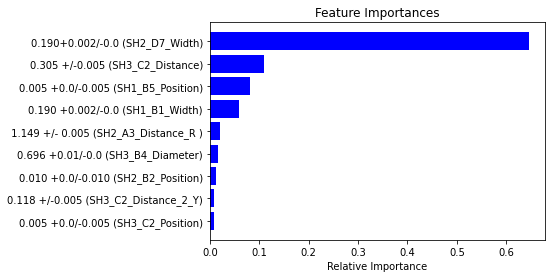

In [31]:
features = df.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()